<a href="https://colab.research.google.com/github/SpineSoloh/Luyten-a/blob/main/ML_for_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

GmData = pd.read_csv('/content/GM (2).csv')
GmData.isnull().sum()
GmData_ffill = GmData.ffill()
GmData['Date'] = pd.to_datetime(GmData['Date'])
GmData.sort_values(by='Date', ascending=True, inplace=True)
pd.read_csv('/content/GM (2).csv').head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-18,34.759998,35.200001,34.290001,34.669998,34.338421,24474100
1,2022-07-25,34.860001,36.439999,33.040001,36.259998,35.913216,67786500
2,2022-08-01,36.060001,38.189999,35.590000,36.060001,35.715130,69156600
3,2022-08-08,36.619999,39.509998,36.220001,39.480000,39.102421,59941000
4,2022-08-15,38.880001,40.279999,37.650002,39.700001,39.320316,64538100


In [ ]:
data = GmData[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

look_back = 14
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i + look_back, 0])
    y.append(scaled_data[i + look_back, 0])
X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

last_forteen_days = scaled_data[-look_back:]
next_day_input = np.reshape(last_forteen_days, (1, look_back, 1))
next_day_prediction = model.predict(next_day_input)
next_day_prediction = scaler.inverse_transform(next_day_prediction)

print("Predicted Closing Price for the Next Trading Day:", next_day_prediction[0][0])

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.2318
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 0.1978
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 0.1671
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.1394
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 0.1152
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0957
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0825
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0781
Epoch 9/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0833
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0930
Epoch 11/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0979
Epoch 12/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0961
Epoch 13/100
1/1 [==============================] -

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

1/1 [==============================] - 0s 43ms/step
Mean Absolute Error (MAE): 2.488871991973877
Mean Squared Error (MSE): 7.515112213448724
Root Mean Squared Error (RMSE): 2.7413704991205994


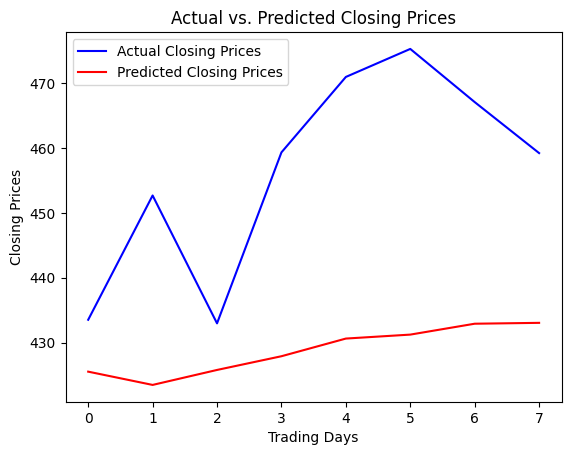

In [ ]:
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_original = scaler.inverse_transform(predictions)

test_index = np.arange(len(y_test_original))
plt.plot(test_index, y_test_original, color='blue', label='Actual Closing Prices')
plt.plot(test_index, predictions_original, color='red', label='Predicted Closing Prices')

plt.xlabel('Trading Days')
plt.ylabel('Closing Prices')
plt.title('Actual vs. Predicted Closing Prices')
plt.legend()
plt.show()